## Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

## Importando e conhecendo a Base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dsday/aluguel.csv', sep = ';')

In [ ]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


Verificando o tipo do dado

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
type(dados['Area'])

pandas.core.series.Series

Informações sobre o dataframe

In [ ]:
dados.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [ ]:
dados.shape

(32960, 9)

In [ ]:
print('A base de dados apresenta {} registros (imóveis) e {} variáveis'.format(dados.shape[0], dados.shape[1]))

A base de dados apresenta 32960 registros (imóveis) e 9 variáveis


## Agrupando Tipos de imóveis

Verificando quais tipos de imóveis existem no dataset

In [ ]:
dados['Tipo'].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
tipos = pd.DataFrame(dados['Tipo'].unique())

In [ ]:
tipos

,0
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


### Selecionando apenas os imóveis que classificamos como residenciais.

Documentando os tipos de imóveis residenciais

In [ ]:
residencial = ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

Usando o método isin() para verificar a existencia dos tipos no dataset

In [ ]:
selecao = dados['Tipo'].isin(residencial)

In [ ]:
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

Criando um novo data frame somente com os imóveis residenciais

In [ ]:
dados_residencial = dados[selecao]

In [ ]:
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Reconstruindo os índices do dataframe residencial

In [ ]:
dados_residencial.index = range(dados_residencial.shape[0])

In [ ]:
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Exportando a nova base de dados

In [ ]:
dados_residencial.to_csv('/content/drive/MyDrive/Colab Notebooks/dsday/dados_residencial.csv', sep=';', index=False)

*marcando o index como falso pois ele já existe no dataframe

## Explorando os dados residenciais

In [ ]:
residencial = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dsday/dados_residencial.csv', sep=';')

In [ ]:
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
residencial.head(20)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


### Realizando seleções

In [ ]:
bairro = residencial['Bairro'] == 'Copacabana'

In [ ]:
type(bairro)

pandas.core.series.Series

In [ ]:
bairro

0         True
1        False
2        False
3        False
4        False
         ...  
22575    False
22576    False
22577    False
22578    False
22579    False
Name: Bairro, Length: 22571, dtype: bool

In [ ]:
copacabana = residencial[bairro]

In [ ]:
copacabana

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
12,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0
13,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
26,Apartamento,Copacabana,3,1,2,378,10000.0,2150.0,700.0
...,...,...,...,...,...,...,...,...,...
22537,Apartamento,Copacabana,1,0,0,60,2400.0,530.0,78.0
22549,Apartamento,Copacabana,2,0,0,67,2450.0,679.0,80.0
22563,Apartamento,Copacabana,2,0,1,70,4100.0,700.0,90.0
22564,Apartamento,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [ ]:
print('De {} imóveis residenciais, {} estão em Copacabana.'.format(residencial.shape[0], copacabana.shape[0]))

De 22571 imóveis residenciais, 2759 estão em Copacabana.


Verificando o percentual dos bairros, utilizando o value_counts

In [ ]:
bairros_percentual = residencial['Bairro'].value_counts(normalize=True) * 100

In [ ]:
bairros_percentual

Barra da Tijuca             17.369353
Copacabana                  12.223206
Ipanema                      7.971656
Recreio dos Bandeirantes     7.404783
Leblon                       5.655447
                              ...    
Caju                         0.004429
Rio da Prata                 0.004429
Cidade Jardim                0.004429
Coelho Neto                  0.004429
Grumari                      0.004429
Name: Bairro, Length: 154, dtype: float64

In [ ]:
residencial['Bairro'].unique().shape[0]

154

### Tratamento de dados faltantes

In [ ]:
residencial.head(20)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


Formas de verificar valores nulos

In [ ]:
residencial.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [ ]:
residencial.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
22575,True,True,True,True,True,True,True,True,True
22576,True,True,True,True,True,True,True,True,True
22577,True,True,True,True,True,True,True,True,True
22578,True,True,True,True,True,True,True,True,True


In [ ]:
residencial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


Retornando um dataframe de dados faltantes em 'Valor'

In [ ]:
residencial[residencial['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


Eliminando valores nulos em 'Valor' no dataset residencial, utilizando o dropna()

utilizando apenas a coluna 'Valor' como objetivo, já que em casas, não pagamos condomínio, então é justificável haver valor nulo nesses casos.

In [ ]:
residencial.dropna(subset= ['Valor'], inplace = True)

In [ ]:
residencial[residencial['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [ ]:
residencial.head(20)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [ ]:
residencial.fillna(0, inplace= True)

In [ ]:
residencial.head(20)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


## Substituindo o dataset anterior pelo atual

In [ ]:
residencial.to_csv('/content/drive/MyDrive/Colab Notebooks/dsday/dados_residencial.csv', sep=';', index = False)

## Criando e Excluindo Novas Variáveis

Criaremos uma nova variável chamada Valor Bruto, que consistirá na união dos valores das variáveis Valor, Condominio e IPTU.

In [ ]:
residencial['Valor Bruto'] = residencial['Valor'] + residencial['Condominio'] + residencial['IPTU']

In [ ]:
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0
...,...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0


Há diferentes formas de excluir uma variável, mas utilizaremos o drop()

No caso do método drop(), precisaremos especificar o eixo em que se dará a exclusão, uma vez que ele pode atuar especificamente em linhas ou colunas. Então, escreveremos axis = 1, afinal o eixo 0 corresponde às linhas e o 1 corresponde às colunas.

In [ ]:
residencial.drop(['Valor Bruto'], axis = 1, inplace = True)

In [ ]:
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Mais uma seleção

In [ ]:
bairros_percentual =  residencial['Bairro'].value_counts(normalize=True) * 100
bairros_percentual.head(20)

Barra da Tijuca             17.371849
Copacabana                  12.223650
Ipanema                      7.974835
Recreio dos Bandeirantes     7.407736
Leblon                       5.657702
Tijuca                       4.931106
Botafogo                     3.938682
Flamengo                     3.203225
Campo Grande                 2.361437
Lagoa                        2.188649
Freguesia (Jacarepaguá)      2.042444
Laranjeiras                  1.896239
Centro                       1.541801
Vila Isabel                  1.346861
Jardim Botânico              1.178503
Méier                        1.160782
São Conrado                  1.156351
Jacarepaguá                  1.094325
Leme                         1.027868
Gávea                        0.952550
Name: Bairro, dtype: float64

após verificar a porcentagem dos bairros, selecionarei os 6 primeiros

In [ ]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Recreio dos Bandeirantes', 'Leblon', 'Tijuca']

Selecionando os bairros e criando um novo dataframe

In [ ]:
selecao = residencial['Bairro'].isin(bairros)
grupo_bairro = residencial[selecao]

grupo_bairro

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
12,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0
13,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
...,...,...,...,...,...,...,...,...,...
22570,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
22571,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
22572,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
22574,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0


In [ ]:
type(grupo_bairro)

pandas.core.frame.DataFrame

## Estatísticas Descritivas

In [ ]:
bairros_percentual = grupo_bairro['Bairro'].value_counts(normalize=True) * 100
bairros_percentual

Barra da Tijuca             31.262956
Copacabana                  21.998086
Ipanema                     14.351778
Recreio dos Bandeirantes    13.331207
Leblon                      10.181789
Tijuca                       8.874183
Name: Bairro, dtype: float64

Text(0.5, 1.0, 'Distribuição dos bairros')

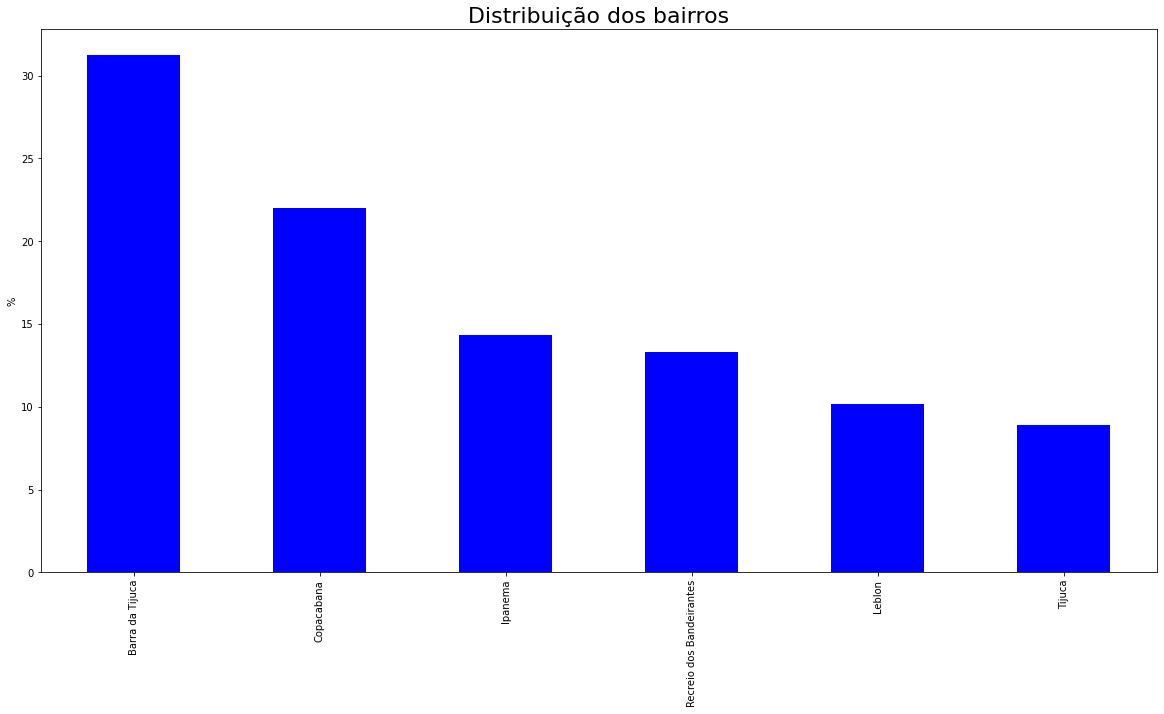

In [ ]:
fig1 = bairros_percentual.plot.bar(color='blue')
fig1.set_ylabel('%')
fig1.set_title('Distribuição dos bairros',{'fontsize':22})

Text(0.5, 1.0, 'Distribuição dos Bairros')

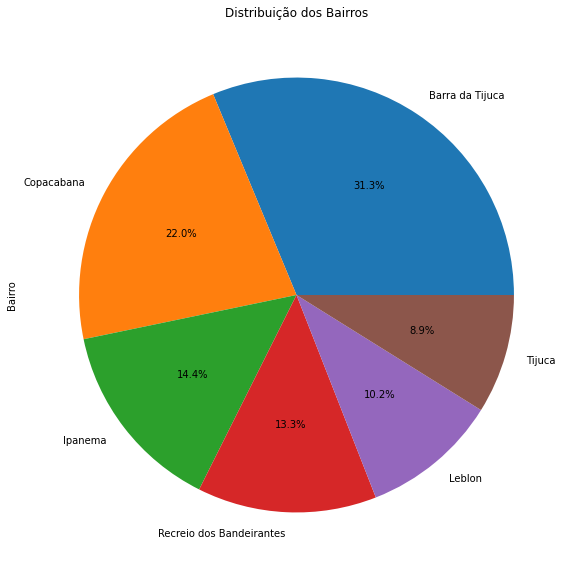

In [ ]:
pie1 = bairros_percentual.plot.pie(autopct='%1.1f%%')
pie1.set_title('Distribuição dos Bairros')

trazendo o valor médio dos imoveis nos bairros selecionados

6037.116329134109